# Linear Regression Project

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(import sklearn as you need it.)**

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [6]:
df = pd.read_csv('Ecommerce Customers')

**Checking the head of customers, and checking out its info() and describe() methods.**

In [7]:
df.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [8]:
df.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Using seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns**

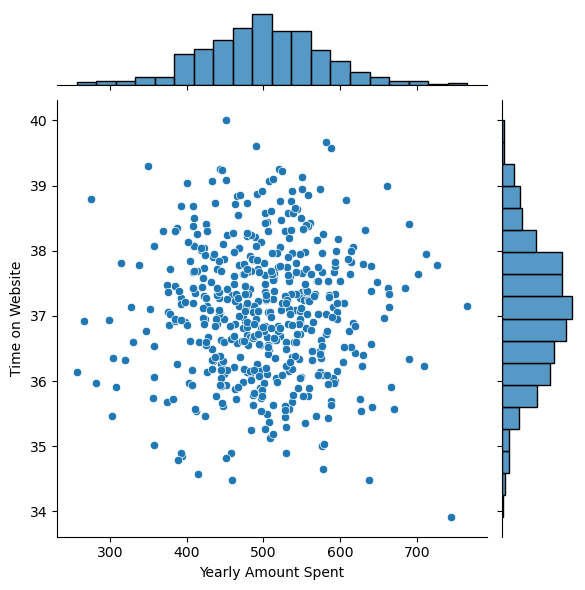

In [15]:
sns.jointplot(df, x=df['Yearly Amount Spent'], y=df['Time on Website'])

** Do the same but with the Time on App column instead. **

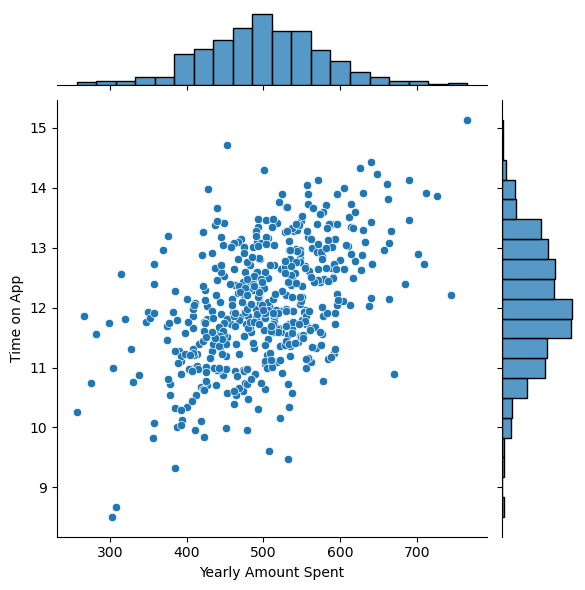

In [16]:
sns.jointplot(df, x=df['Yearly Amount Spent'], y=df['Time on App'])

** Using jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

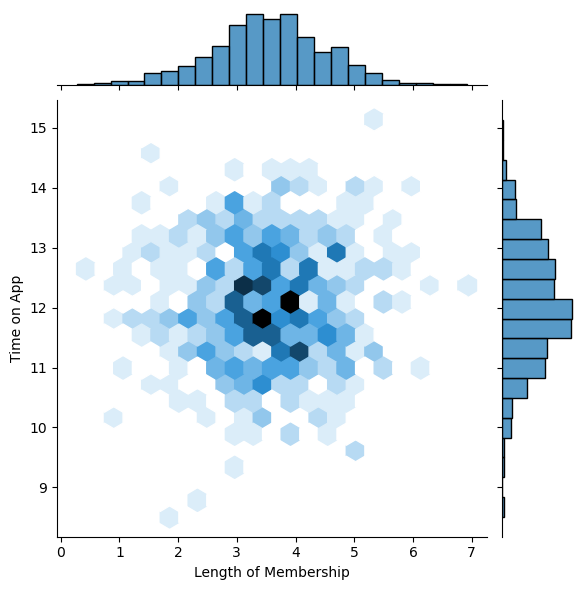

In [21]:
sns.jointplot(df, x=df['Length of Membership'], y=df['Time on App'], kind='hex')

**Let's explore these types of relationships across the entire data set. Using [pairplot] to recreate the plot below.(Don't worry about the the colors)**

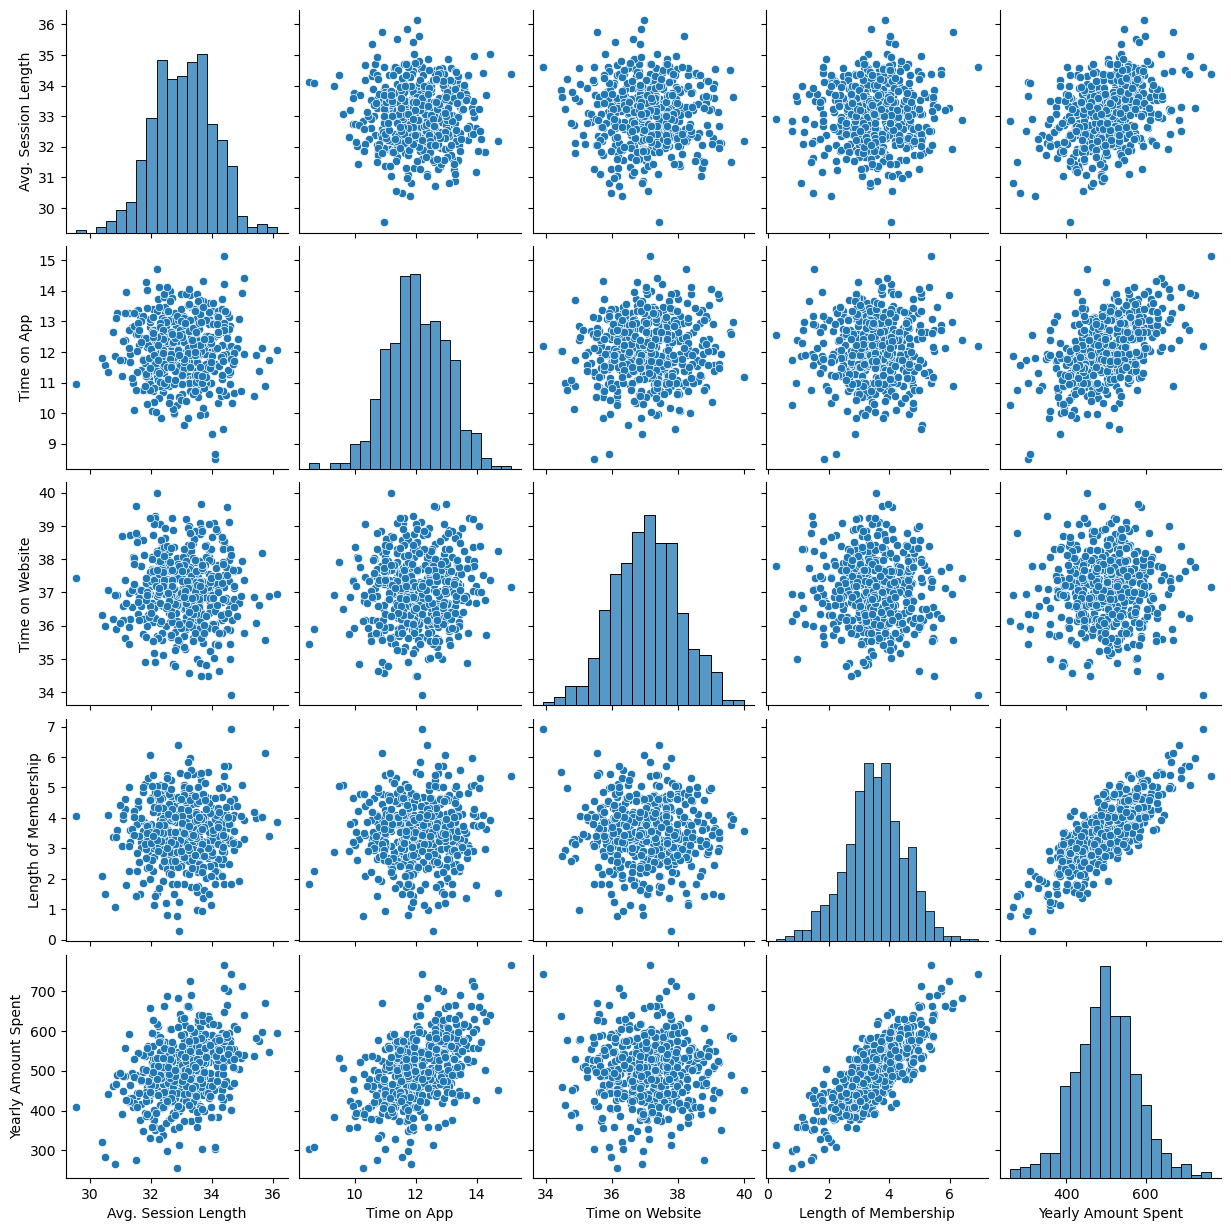

In [22]:
sns.pairplot(df)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [23]:
# Length of Membership

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

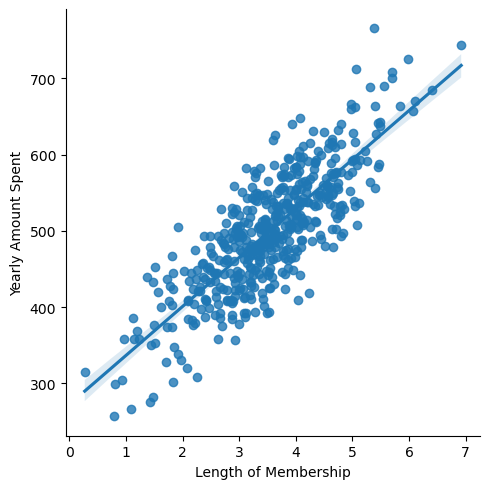

In [28]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Setting a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [30]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [31]:
X = df[[ 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [32]:
y = df['Yearly Amount Spent']

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [35]:
from sklearn.linear_model import LinearRegression

**Creating an instance of a LinearRegression() model named linregmodel.**

In [36]:
linregmodel = LinearRegression()

** Train/fit lm on the training data.**

In [38]:
linregmodel.fit(X_train, y_train)

LinearRegression()

**Print out the coefficients of the model**

In [40]:
linregmodel.coef_

array([25.70676165, 38.57260842,  0.62520092, 61.71767604])

In [41]:
linregmodel.intercept_

-1056.0720593081394

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [43]:
predictions = linregmodel.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

Text(0.5, 0, 'Actual values')

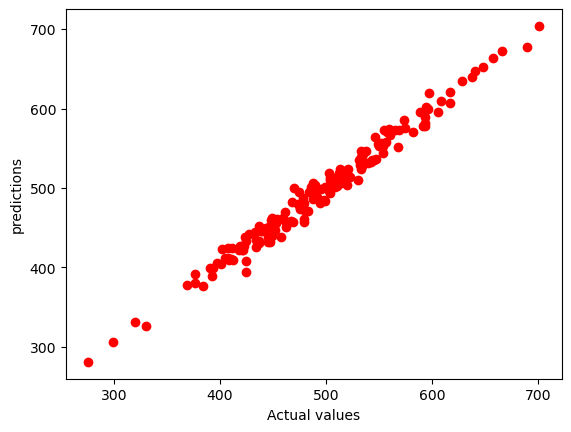

In [50]:
plt.scatter(x=y_test, y=predictions, c='r')
plt.ylabel('predictions')
plt.xlabel('Actual values')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [51]:
from sklearn import metrics

In [55]:
MAE = metrics.mean_absolute_error(y_test, predictions)

In [56]:
MSE = metrics.mean_squared_error(y_test, predictions)

In [60]:
RMSE = np.sqrt(MSE)

In [76]:
print(MAE, '-- MAE', '\n', MSE, '-- MSR','\n', RMSE, '-- RMSE')

8.353573525017548 -- MAE 
 102.40428659931881 -- MSR 
 10.119500313717017 -- RMSE


MAE: 7.22814865343
MSE: 79.813051651
RMSE: 8.93381506698


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

/tmp/ipykernel_10246/1051567054.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions, bins=50)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

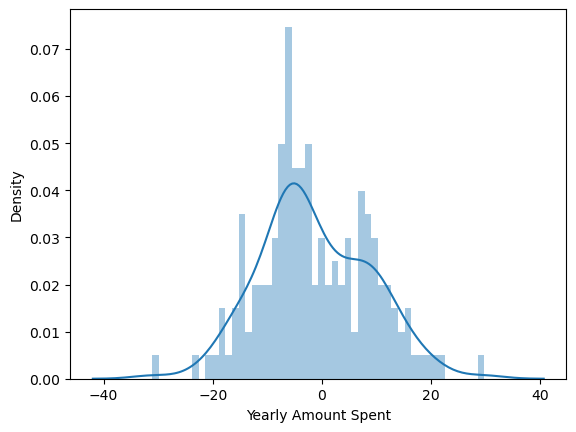

In [83]:
sns.distplot(y_test-predictions, bins=50)

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [90]:
index = X.columns

In [93]:
coef = linregmodel.coef_

In [96]:
coefdf = pd.DataFrame(coef, index, columns=['Coeffecient'])

In [97]:
coefdf

Coeffecient
Avg. Session Length     25.706762
Time on App             38.572608
Time on Website          0.625201
Length of Membership    61.717676